In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from shutil import rmtree
from pathlib import Path
from tqdm import tqdm
import pandas as pd
import numpy as np
import json
import re
from datetime import datetime

In [2]:
### path of the log
## test1 one node local provider with default parameters(1 threads in sampling, psi4 calculator 1 threads)
# cpu_log = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/save_runs/dft-md-23Sep16-062515-d68b07/gpu006cpu_usage_20230916_142520.log') ## cpu log test
# gpu_log = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/save_runs/dft-md-23Sep16-062515-d68b07/gpu006gpu_usage_20230916_142520.log') ## gpu log test
# mem_log = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/save_runs/dft-md-23Sep16-062515-d68b07/gpu006mem_usage_20230916_142520.log') ## mem log test

## test2 one node local provider with 4threads in sampling
# cpu_log = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/save_runs/dft-md-23Sep18-112842-d68b07/gpu002cpu_usage_20230918_192848.log')
# gpu_log = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/save_runs/dft-md-23Sep18-112842-d68b07/gpu002gpu_usage_20230918_192848.log')
# mem_log = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/save_runs/dft-md-23Sep18-112842-d68b07/gpu002mem_usage_20230918_192848.log')

## test group 2 one node with new parameters compare 8 threads vs max threads
# 8 threads
cpu_log = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/20230920_204954/gpu006cpu_usage_20230920_204958.log')
gpu_log = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/20230920_204954/gpu006gpu_usage_20230920_204958.log')
mem_log = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/20230920_204954/gpu006mem_usage_20230920_204958.log')
# max threads
cpu_log = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/20230920_205433/gpu005cpu_usage_20230920_205442.log')
gpu_log = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/20230920_205433/gpu005gpu_usage_20230920_205442.log')
mem_log = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/finetuning-surrogates/runs/20230920_205433/gpu005mem_usage_20230920_205442.log')


In [3]:
#### draft code
## process gpu util
# df = pd.read_csv(gpu_log)

# # 将 Timestamp 列转换为日期时间类型
# df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# # timestamp = df['Timestamp']

# # 绘制 GPU 利用率折线图
# plt.figure(figsize=(10, 6))
# # timestamp not accurate， some data share the same timestamp
# # gpu_utilization = df.groupby('Timestamp')['GPU Utilization (%)']
# # timestamp = gpu_utilization.groups.keys()
# # gpu_utilization_mean = gpu_utilization.mean()
# # rows = gpu_utilization.head(60*10*4)
# gpu_utilization_group = df.groupby('GPUs')['GPU Utilization (%)']
# gpu = [ gpu_utilization_group.get_group(i) for i in range(0, len(gpu_utilization_group.groups.keys()))]


# rows_plot = [rows[i] for i in range(0, len(rows), 4)]
# plt.plot(gpu[0], label='GPU 0', color='red', linestyle='--')
# # plt.plot(gpu_utilization_mean, label='GPU Mean', color='blue', linestyle='--')
# # gpu_utilization.plot()
# plt.xlabel('Timestamp')
# plt.ylabel('GPU Utilization (%)')
# plt.title('GPU Utilization Over Time')
# plt.grid(True)
# # print(len(df.groupby('Timestamp')['GPU Utilization (%)']))
# # print(gpu_utilization_group.groups.keys())

#### functions
def get_gpu_data(gpu_log:str) -> pd.DataFrame:
    df = pd.read_csv(gpu_log)
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    gpu_utilization_group = df.groupby('GPUs')['GPU Utilization (%)']
    gpu = [ gpu_utilization_group.get_group(i) for i in range(0, len(gpu_utilization_group.groups.keys()))]
    return gpu

def plot_gpu_util(gpu:list[pd.DataFrame]) -> None:
    gpu = get_gpu_data(gpu_log)
    plt.figure(figsize=(10, 6))
    colors = ['red', 'blue', 'green', 'orange']
    for i in range(len(gpu)):
        plt.plot([i for i in range(len(gpu[i]))],gpu[i], label=f'GPU {i}', color=colors[i], linestyle='--')
        plt.legend()
    # plt.plot(gpu[0], label='GPU 0', color='red', linestyle='--')
    plt.xlabel('Timestamp')
    plt.ylabel('GPU Utilization (%)')
    plt.title('GPU Utilization Over Time')
    plt.grid(True)

In [29]:
# TODO add time stamp to the plot
df = pd.read_csv(gpu_log)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
gpu_utilization_group = df.groupby('GPUs')['GPU Utilization (%)']
time_stamp = df.groupby('GPUs')['Timestamp']
a=time_stamp.groups.values()
print(a)
print(df['Timestamp'].iloc[0])
list = df.values.tolist()

dict_values([Int64Index([   0,    4,    8,   12,   16,   20,   24,   28,   32,   36,
            ...
            6556, 6560, 6564, 6568, 6572, 6576, 6580, 6584, 6588, 6592],
           dtype='int64', length=1649), Int64Index([   1,    5,    9,   13,   17,   21,   25,   29,   33,   37,
            ...
            6557, 6561, 6565, 6569, 6573, 6577, 6581, 6585, 6589, 6593],
           dtype='int64', length=1649), Int64Index([   2,    6,   10,   14,   18,   22,   26,   30,   34,   38,
            ...
            6558, 6562, 6566, 6570, 6574, 6578, 6582, 6586, 6590, 6594],
           dtype='int64', length=1649), Int64Index([   3,    7,   11,   15,   19,   23,   27,   31,   35,   39,
            ...
            6559, 6563, 6567, 6571, 6575, 6579, 6583, 6587, 6591, 6595],
           dtype='int64', length=1649)])
2023-09-20 20:49:58


In [14]:
## cpu util functions
header_pattern = r'\((\d+) CPU\)'
data_pattern = r'^\d{2}:\d{2}:\d{2} [AP]M\s+(\w+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)'
pattern = [header_pattern,data_pattern]
def get_cpu_util(path:Path,pattern:list[str]) -> list:
    
    with open (path, 'r') as file:
        ## only get one header
        time = []
        is_header = True
        for line in file:
            line = line.strip()
            
            if is_header:
                match = re.search(pattern[0], line)
                if match:
                    num_cpu = int(match.group(0)[1:3])
                    print("number of cpus:")
                    print(num_cpu)
                    cpu_utilization = [[] for i in range (0,num_cpu+1)]
                    is_header = False
            
            match = re.match(pattern[1],line)
            if match:
                cpu_stats = [match.group(i) for i in range(1,12)]
                # get time stamp
                time_stamp = match.group(0)[0:8]
                am_pm = match.group(0)[9:11]
                # convert it to 24-hour
                time_obj = datetime.strptime(time_stamp + am_pm, "%I:%M:%S%p")
                time_24h_str = time_obj.strftime("%H:%M:%S")
                # cpu_utilization[i].append([time_24h_str] + cpu_stats)
                if (cpu_stats[0] == 'all'):
                    cpu_utilization[num_cpu].append([round(float(i)) for i in cpu_stats[1:]])
                else:
                    cpu_utilization[int(cpu_stats[0])].append([round(float(i)) for i in cpu_stats[1:]])
                if(cpu_stats[0]=='0'):
                    time.append(time_24h_str)
                
    return time,cpu_utilization

def plt_cpu_util(time_stamp:list,cpu_util:list,title:str,cpu_num:int=-1):
    # plt.figure(figsize=(100,100))
    plt.plot(time_stamp,cpu_util)
    
    # 添加标题和坐标轴标签
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Utilization (%)')
    # 显示图形
    plt.grid(True)
    plt.show()
    

In [18]:

## plt mem util
def get_mem_data(mem_log:str)->pd.DataFrame:
    df = pd.read_csv(mem_log, sep=r'\s+')
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    list = df.values.tolist()
    return list

def plt_mem_util(mem_data:list,title:str):
    plt.figure(figsize=(10, 6))
    plt.plot([i[0] for i in mem_data],[i[-1] for i in mem_data])
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Mem Usage (Gb)')
    plt.grid(True)
    plt.show()

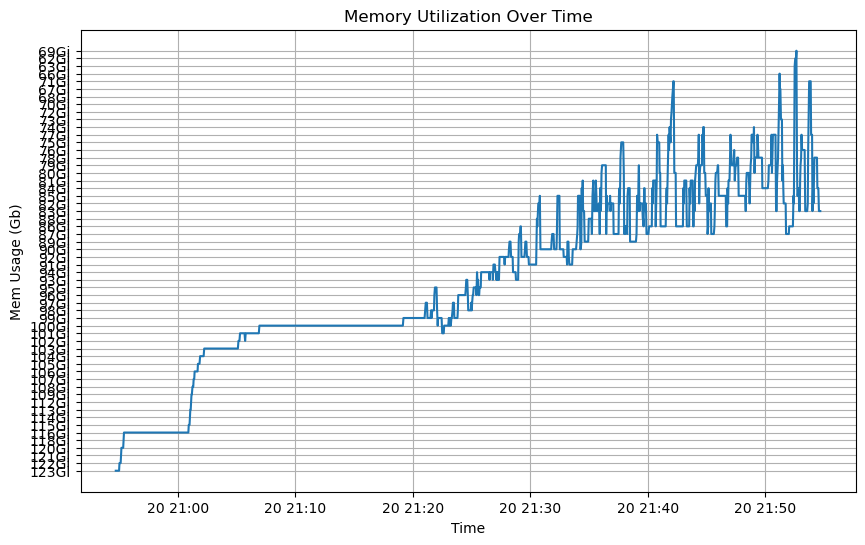

In [19]:
mem_data = get_mem_data(mem_log)
plt_mem_util(mem_data,'Memory Utilization Over Time')

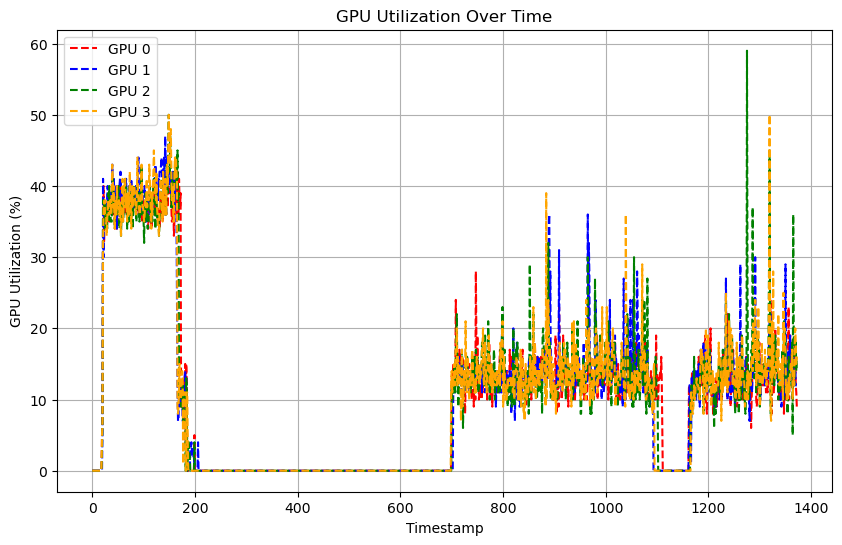

In [6]:
gpu_data = get_gpu_data(gpu_log)
plot_gpu_util(gpu_data)


number of cpus:
56


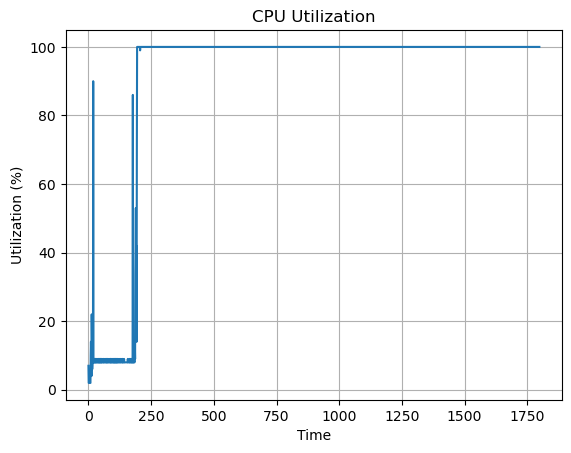

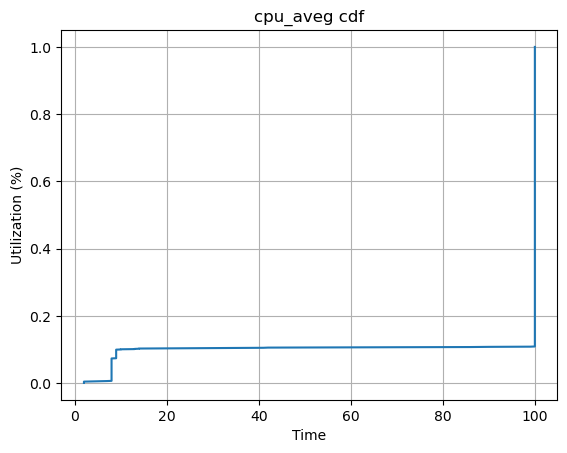

In [15]:

time_stamp,cpu_utilization = get_cpu_util(cpu_log,pattern)
# print(len(cpu_utilization))
# print(type(pattern))
# print(type(pattern[0]))
cpu_util = [round(100 - cpu_utilization[-1][i][-1]) for i in range(0,len(cpu_utilization[0]))]

## just use 10 mins data
# cpu_util = cpu_util[0:10*60]

sorted = np.sort(cpu_util)
cdf = np.arange(1,len(sorted)+1)/len(sorted)
plt_cpu_util([i for i in range(0,len(cpu_util))],cpu_util,'CPU Utilization')
plt_cpu_util(sorted,cdf,"cpu_aveg cdf")

